# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [2]:
# Load the country clusters data
data = pd.read_csv('C:/Users/iolley2/Desktop/DS Contd/Cluster Analysis/K-Means/Examples/Countries-exercise.csv')

In [3]:
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

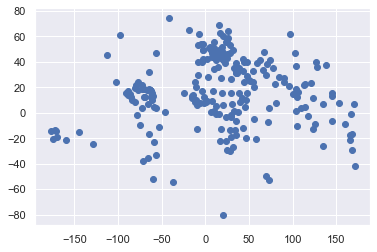

In [5]:
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.show()

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [6]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assume there are only two clusters. 

In [26]:
kmeans2 = KMeans(2,init='k-means++')
kmeans3 = KMeans(3)
kmeans7 = KMeans(7)
kmeans8 = KMeans(8)

In [12]:
kmeans2.fit(x)
kmeans3.fit(x)
kmeans7.fit(x)
kmeans8.fit(x)

KMeans()

### Clustering Resutls

In [13]:
identified_clusters2 = kmeans2.fit_predict(x)
identified_clusters3 = kmeans3.fit_predict(x)
identified_clusters7 = kmeans7.fit_predict(x)
identified_clusters8 = kmeans8.fit_predict(x)

In [14]:
data_with_clusters = data.copy()
data_with_clusters['Cluster2'] = identified_clusters2
data_with_clusters['Cluster3'] = identified_clusters3
data_with_clusters['Cluster7'] = identified_clusters7
data_with_clusters['Cluster8'] = identified_clusters8

Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

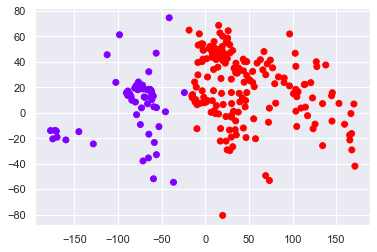

In [15]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster2'],cmap='rainbow')
plt.show()

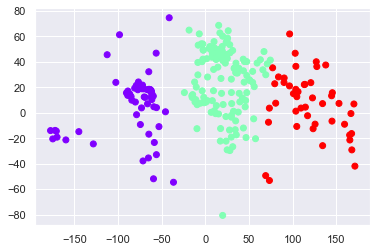

In [16]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster3'],cmap='rainbow')
plt.show()

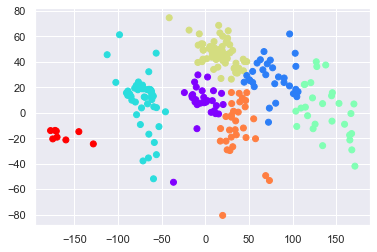

In [17]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster7'],cmap='rainbow')
plt.show()

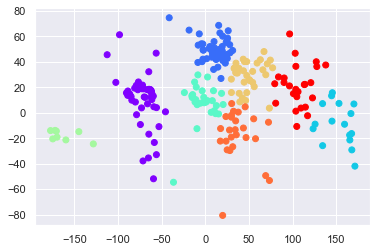

In [18]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster8'],cmap='rainbow')
plt.show()

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [19]:
kmeans.inertia_

657012.0797586322

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [22]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\iolley2\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Within-Cluster Sum of Squares')

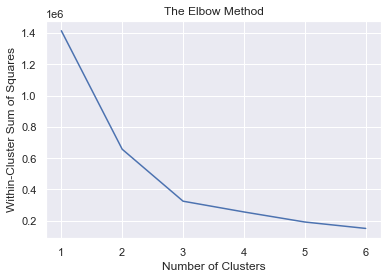

In [23]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>